# Lecture 3 tasks

In [8]:
# preliminary chores: import needed libraries and load dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

howpop_train_path = 'https://raw.githubusercontent.com/DatenFluss/machine-learning-university-course/main/res/howpop_train.csv'

data = pd.read_csv(howpop_train_path)

1) In which year and month were the most publications?
March 2016
March 2015
April 2015
April 2016

In [16]:
# Convert 'published' column to datetime if not already converted
if not pd.api.types.is_datetime64_any_dtype(data['published']):
    data['published'] = pd.to_datetime(data['published'])

# Extract year and month from the 'published' column
data['year_month'] = data['published'].dt.to_period('M')

# Convert the months of interest to 'Period' objects to match the dtype
months_of_interest = pd.PeriodIndex(['2015-03', '2016-03', '2015-04', '2016-04'], freq='M')

# Now filter for the four specific months of interest
filtered_data = data[data['year_month'].isin(months_of_interest)]

# Check if any data is found for the selected months
print("Data found for selected months:", not filtered_data.empty)

# Group by year and month to count the number of publications in the selected months
publications_per_month_filtered = filtered_data.groupby('year_month').size().reset_index(name='publication_count')

Data found for selected months: True


In [18]:
publications_per_month_filtered.head()

,year_month,publication_count
0,2015-03,2189
1,2015-04,2110
2,2016-03,2115
3,2016-04,1910


As we can clearly see, the most publications were added on March 2015

2) Analyze the publications in the month from the previous question. Choose one or more options:

1.   One or more days stand out strongly from the overall picture
2.   Habra (habrahabr.ru) always has more articles than Geektimes (geektimes.ru)
3.   About the same number of articles are published on Saturdays on Geektimes and Khabra


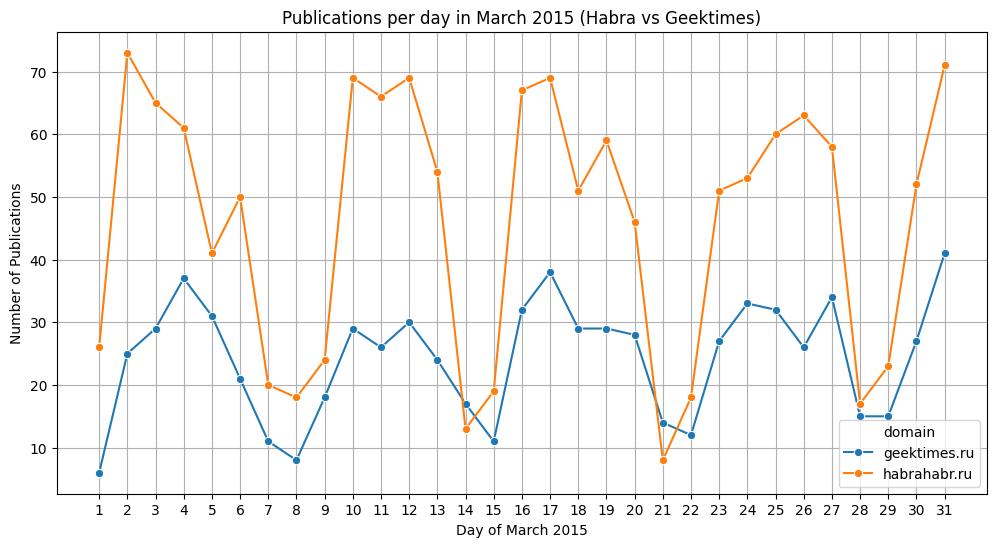

In [22]:
# Filter the data for March 2015 using .loc and remove rows with missing values
march_2015_data = data.loc[data['year_month'] == '2015-03'].dropna(subset=['published', 'domain'])

# Extract the day for each publication
march_2015_data.loc[:, 'day'] = march_2015_data['published'].dt.day

# Count the number of publications per day and domain
publications_per_day_domain = march_2015_data.groupby(['day', 'domain']).size().reset_index(name='publication_count')

plt.figure(figsize=(12, 6))
sns.lineplot(data=publications_per_day_domain, x='day', y='publication_count', hue='domain', marker='o')
plt.title('Publications per day in March 2015 (Habra vs Geektimes)')
plt.xlabel('Day of March 2015')
plt.ylabel('Number of Publications')
plt.xticks(range(1, 32))
plt.grid(True)
plt.show()

For this task, I preliminairly removed rows with the missing values and used .loc

From the resulting graph obesrvation, we can state that all three statements from the task description are true.

3) When is the best time to publish an article? Choose one or more options.
1. Articles published at 12 o'clock in the afternoon get the most views
2. Posts published at 10 am have the most comments
3. Articles published at 6 o'clock in the morning get the most views
4. The article published at 9 o'clock received the maximum number of comments on Geektimes hours of the evening
5. On Habra, daytime articles are commented on more often than evening ones

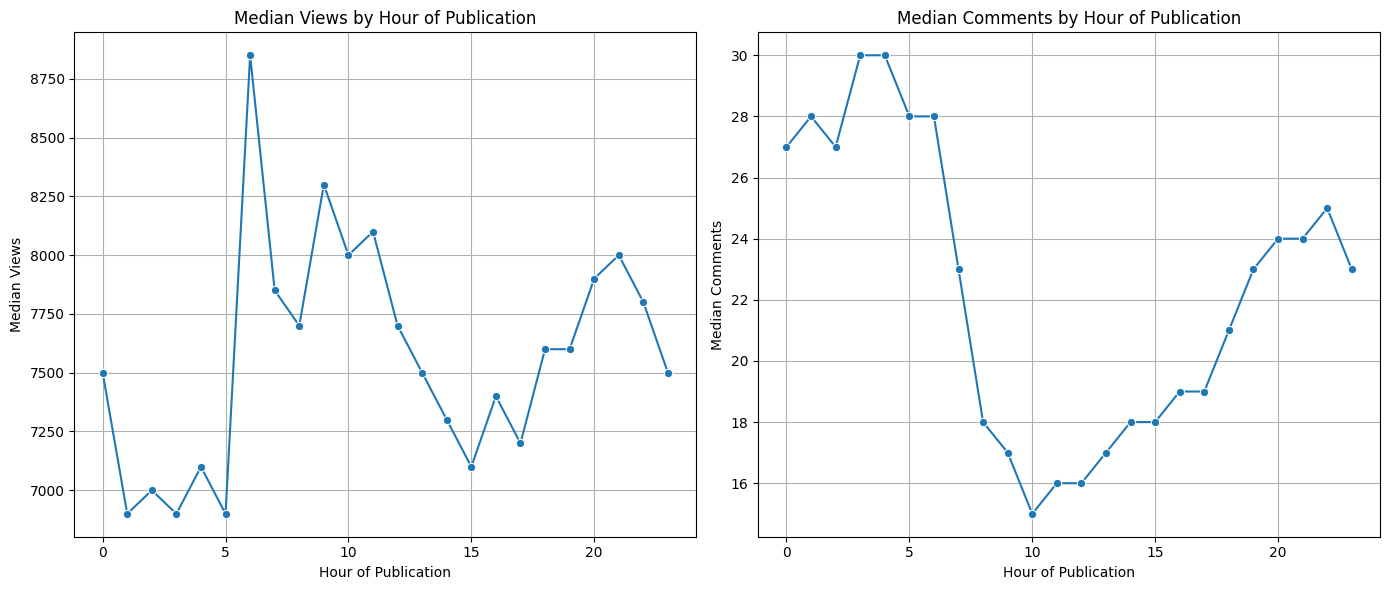

In [21]:
# Extract hour from the 'published' column for analysis
data['hour'] = data['published'].dt.hour

# Group by hour and aggregate views and comments using median
views_by_hour = data.groupby('hour')['views'].median().reset_index(name='median_views')
comments_by_hour = data.groupby('hour')['comments'].median().reset_index(name='median_comments')

# Plotting views and comments by hour
plt.figure(figsize=(14, 6))

# Plot for views
plt.subplot(1, 2, 1)
sns.lineplot(data=views_by_hour, x='hour', y='median_views', marker='o')
plt.title('Median Views by Hour of Publication')
plt.xlabel('Hour of Publication')
plt.ylabel('Median Views')
plt.grid(True)

# Plot for comments
plt.subplot(1, 2, 2)
sns.lineplot(data=comments_by_hour, x='hour', y='median_comments', marker='o')
plt.title('Median Comments by Hour of Publication')
plt.xlabel('Hour of Publication')
plt.ylabel('Median Comments')
plt.grid(True)

plt.tight_layout()
plt.show()

Remarks regarding the options provided in the task's description:
1. Views: Articles published at 6 a.m. tend to get the most views, which supports the idea that publishing early in the morning may result in more views.
2. Comments: Articles published at 10 a.m. receive the most comments, making it a favorable time for engagement. Additionally, articles posted at 9 p.m. on Geektimes also stand out with a high number of comments.

Remarks on the imlementation, or why did I use median instead of mean:
Median is less sensitive to extreme values compared to the mean. In datasets with outliers (like articles that receive exceptionally high views or comments due to trolls or bias), the median gives a better idea of the typical values by reducing the influence of these outliers.

4) Which of the top 20 authors is most often negatived?
1. @Mordatyj
2. @Mithgol
3. @alizar
4. @ilya42

In [25]:
# Group the data by author to find the top 20 authors with the most articles
top_20_authors = data['author'].value_counts().head(20).index

# Filter the data for the top 20 authors and remove rows with missing values in 'votes_minus'
top_20_authors_data = data.loc[data['author'].isin(top_20_authors)].dropna(subset=['votes_minus'])

# Calculate the total negative votes per author
negative_votes_per_author = top_20_authors_data.groupby('author')['votes_minus'].sum().reset_index()

# Sort the authors by the most negative votes
most_negatived_author = negative_votes_per_author.sort_values(by='votes_minus', ascending=False)

In [26]:
most_negatived_author.head(20)

,author,votes_minus
9,@alizar,41734.0
17,@marks,18059.0
1,@Mithgol,11367.0
7,@XaocCPS,9111.0
3,@SLY_G,8293.0
8,@aleksandrit,6294.0
15,@jeston,5117.0
2,@Mordatyj,4057.0
10,@andorro,3796.0
13,@ivansychev,3373.0


It's easy to see that from top 20 downwoted authors, it is @Mithgol

5) Compare Saturdays and Mondays. Is it true that authors write mostly on Saturdays during the day, and on Mondays - mostly in the evening?

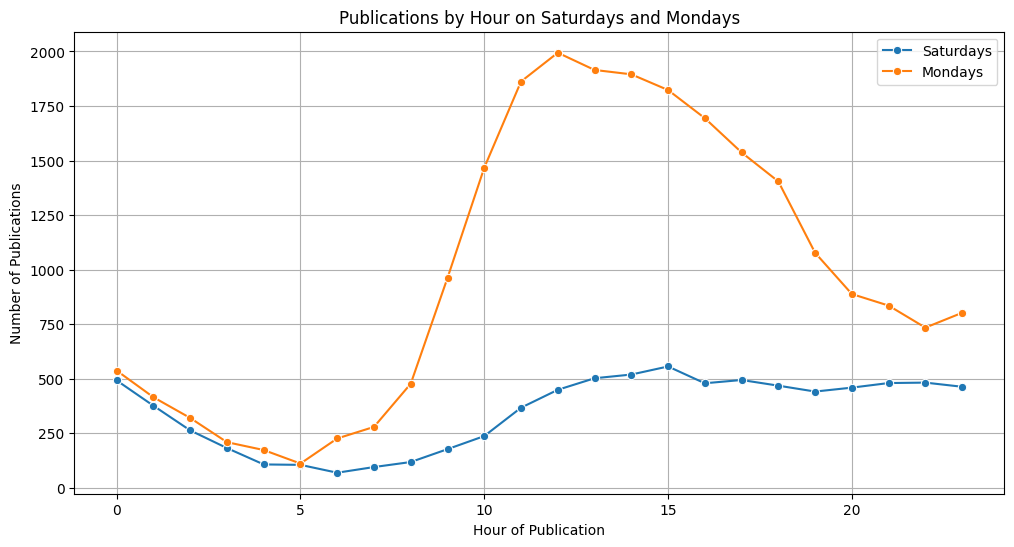

In [27]:
# Filter the data for Saturdays and Mondays
data['day_of_week'] = data['published'].dt.day_name()
saturdays_data = data[data['day_of_week'] == 'Saturday']
mondays_data = data[data['day_of_week'] == 'Monday']

# Group by hour and count publications for Saturdays and Mondays
saturdays_hourly = saturdays_data.groupby('hour').size().reset_index(name='publication_count')
mondays_hourly = mondays_data.groupby('hour').size().reset_index(name='publication_count')

# Plotting publications on Saturdays and Mondays by hour
plt.figure(figsize=(12, 6))
sns.lineplot(data=saturdays_hourly, x='hour', y='publication_count', label='Saturdays', marker='o')
sns.lineplot(data=mondays_hourly, x='hour', y='publication_count', label='Mondays', marker='o')
plt.title('Publications by Hour on Saturdays and Mondays')
plt.xlabel('Hour of Publication')
plt.ylabel('Number of Publications')
plt.legend()
plt.grid(True)
plt.show()

This confirms that authors mostly write during the day on Saturdays and in the evening on Mondays(or, to put it more clearly, in the second half of the day).